# Estimating Collegetown Rent Prices: A Hedonic Analysis
*A project by Nathan Blumenfeld (njb93)*  
*Made for ORIE 2380 - Urban Analytics, Updated May 2021*


## Table of Contents
1. [Introduction](#intro)  
    1.1. [Background](#intro/background")  
    1.2. [Problem Statement](#intro/problem")  
    1.3. [Abstract](#intro/abstract")  
    1.4. [Packages](#intro/packages")    
2. [Data](#data)      
    2.1. [About the Data](#data/about)   
    2.2. [Collection](#data/collection)   
    2.3. [Pre-Processing](#data/processing)  
    2.4. [Variables](#data/variables)  
3. [Exploratory Data Analysis](#EDA)     
    3.1. [Target Variable: Sale Price](#EDA/target)  
    3.2. [Testing Assumptions of Linear Regression](#EDA/assumptions)  
    3.3. [Correlations](#EDA/correlations)  
    3.4. [Omitting Bias](#EDA/bias)  
4. [Modeling](#modeling)   
    4.1. [Model Creation](#modeling/construction)    
    4.2. [Model Selection](#modeling/selection)   
    4.3. [Model Validation](#modeling/validation)     
5. [Conclusion](#conclusion)   
    5.1. [Primary Findings](#conclusion/findings)   
    5.2. [Potential Areas for Improvement](#conclusion/improvement)   
    5.3. [Reflection](#conclusion/reflection)   
6. [References & Resources](#references)

<a id="intro"></a>
## 1. Introduction

<a id="intro/background"></a>
### 1.1.  Background

In 2018, there were Cornell 15,000 students living off campus in Tompkins County. 
the vacancy rate remains well below average. Forcing students to sign leases often 2+ years out. 

Cornell guarantees housing only to its Freshman and Sophomore students. 
   
Students are paying a premium for lower quality housing

Attempts to increase housing supply 

“The New York Times article that just came out that looked at all of these market areas had, to me, really surprising results,” said Paul Mazzarella, Executive Director of Ithaca Neighborhood Housing Services (INHS). “I knew Ithaca was expensive. I’ve also known New York City was very expensive. One of things that makes rentals expensive in Ithaca is that the supply of rental units is really limited.”


<img src="rents-by-school.png"  width="700" align="left"/>    


<a id="intro/problem"></a>
### 1.2. Problem Statement

With limited supply, often wealthy renters, and highly variable geography, it is clear that the collegetown rental market is unique. Students often consider distance to campus, ease of walking, proximity to useful bus stops and popular social locations when looking at potential housing. Within such a market, how do Cornell students actually value collegetown rentals? Is it possible to isolate the factors that actually drive prices, and help Cornell students find value relative to their living preferences? 

<a id="intro/abstract"></a>
### 1.3. Abstract
Project finds that exploratory analysis,
Mutilvariate regression modeling. 
Hedonic pric

<a id="intro/packages"></a>
### 1.4. Packages 

#### Packages Used
1. [requests](https://requests.readthedocs.io/en/master/) for handling HTTS requests
2. [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for parsing website data
3. [Folium](https://python-visualization.github.io/folium/) for geospatial presentation 
4. [Pandas](https://pandas.pydata.org/) for data mangement
5. [Selenium](https://selenium-python.readthedocs.io/) for scraping dynamic sites
6. [Folium](https://python-visualization.github.io/folium/) for geographic visualization  
7. [SciPy](#https://docs.scipy.org/doc/scipy/reference/) for statistical analysis

In [2]:
#import above packages
import pandas as pd
import numpy as np
import folium 
import selenium
from scipy import stats
from scipy.stats import norm, skew 
import requests
import json
import time
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf


<a id="data"></a>
## 2. Data

<a id="data/about"></a>
### 2.1. About the Dataset
The Cornell University Office of Off-Campus Living maintains a pubically-accessible [database of rental listings]( https://listings.offcampusliving.cornell.edu). 

Database Curators Contact Information:  
>Office of Off-Campus Living  
531 Willard Straight Hall   
Ithaca, New York 14891
(607) 254-8383  
offcampusliving@cornell.edu. 

The database allows users to filter by the following: 
> - Price (0-5000 USD)
> - Number of Bedrooms (0-10+) 
> - Pets Allowed? (Yes, No)
> - Listing Type (Any, Commencement, Fall Sublet, Graduate, Sabbatic Housing, Short-Term Housing, Spring Sublet, Staff/Faculty, Summer Sublet, Undergradate)
> - Housing Type (Rent, Room to Rent, Share)
> - Date Availible (MM-DD-YYYY)

And provides information about each individual listing under the following conventions:   
> - Address
> - Topline Description
> - Extended Description
> - Number of Bedrooms
> - Number of Bathrooms
> - Pets Allowed (yes,no)
> - Housing Type (Rent, Room to Rent, Share)
> - Listing Type (Any, Commencement, Fall Sublet, Graduate, Sabbatic Housing, Short-Term Housing, Spring Sublet, Staff/Faculty, Summer Sublet, Undergradate)
> - Rent (price per unit in USD)
> - Date Availible
> - Amenities
>       - Air Conditioning
>       - Electricity Included
>       - Electronic Payments Accepted
>       - Furnished
>       - Heat Included
>       - Internet Included
>       - Kitchen
>       - Laundry Facilities
>       - Near Bus Route
>       - Off-Street Parking Available
>       - Off-Street Parking Included
>       - Permitted Street Parking Available 
>       - Water Included
> n.b. Information related to safety standards is provided, but only for a limited number of listings and as often incomplete. For the purposes of this project, it will be ignored. 


On their [website](https://scl.cornell.edu/residential-life/housing/campus-living/landlords), The Office of Off-Campus Living offers the following information:

>Our office, in conjunction with the Student Services IT (Information Technology) department, has worked to create an entirely new listing database with great features. Notice: Properties within the City of Ithaca must have a current Certificate of Compliance with the City of Ithaca Building Department to post your listing. The system is set up to only allow listings to be paid for up the expiration date of the COC. Unlike the old system, listings do not require administrative approval to go live as the COC check is now fully automated. Listings will be searchable once they are paid for and made active by the landlord. 
> - New dynamic search pages via Google Map search or criteria search  
> - Increased security-viewers will not see contact information (email or phone) without first authenticating a Cornell University relationship 
> - Automated Certification of Compliance verification for properties within the City of Ithaca 
> - Photos and Images 
> - Multiple photos can be added to your listing 
> - Listings can be extended from 1 to 12 months (properties within the city cannot be extended past the month the COC expires.) 
> - Listings are one flat rate of 30 USD per month
> - The System has been designed to be-compatible with all major browsers and operating systems on computers, tablet and smartphones 
> - Manage your listings  
> - Activate/Inactivate
> - Verify and update Google Map location 
> - Reactivate expired listings 
> - Update property photos


**Why use this data?**    
Regression analysis often noisy and subject to error. By using a dataset of listings specifically targeted to Cornell Students, the dataset offers a useful proxy for the Cornell specific market which this project hopes to analyze. In theory, this reduces the noise associated with listings outside, and allows for a better understanding of what Cornell students for in rental housing.   

<a id="data/collection"></a>
### 2.2. Collection

In [6]:
def createnewDictionary():
    #creates new empty dictionary for each listing. amenities bools are default false
    new_dict = {'listingAddress' : '',
    'unitNumber' : '',    
    'listingId' : '', 
    'rentAmount' : '', 
    'rentType' : '', 
    'bedrooms' : '', 
    'bathrooms' : '', 
    'housingType' : '', 
    'dateAvailable' : '', 
    'gmapLatitude' : '', 
    'gmapLongitude' : '', 
    'pets' : '',
    'air_conditioning' : False,
    'electricity_included' : False,
    'electronic_payments' : False,
    'furniture_included': False,
    'heat_included' : False ,
    'internet_included' : False,
    'kitchen_available' : False,
    'laundry_available' : False,
    'near_bus' : False,
    'osparking_available' : False,
    'osparking_included' : False,
    'psparking_available' : False,
    'water_included' : False,
    'faculty' : False, 
    'ugrad' : False,
    'sabbatical' : False,      
    'fa_sublet' : False, 
    'sp_sublet' : False,     
    'sum_sublet' : False,    
    'short_term' : False,
    'graduate': False}     
    return new_dict

In [7]:
potential_amenities = {'Air Conditioning' : 'air_conditioning',
                                                'Electricity Included' : 'electricity_included',
                                                'Electronic Payments Accepted ': 'electronic_payments',
                                                'Furnished' : 'furniture_included',
                                                'Heat Included': 'heat_included',
                                               'Internet Included' : 'internet_included',
                                               'Kitchen': 'kitchen_available',
                                                'Laundry Facilities' : 'laundry_available',
                                                'Near Bus Route' : 'near_bus',
                                                'Off-Street Parking Available' : 'osparking_available',
                                                'Off-Street Parking Included' : 'osparking_included',
                                                'Permitted Street Parking Available' : 'psparking_available',
                                                'Water Included' : 'water_included'} 

listing_types = {'Graduate' : 'graduate',
                 'Staff/Faculty' : 'faculty',
                 'Undergraduate' : 'ugrad', 
                 'Sabbatic housing' : 'sabbatical',
                 'Fall Sublet' : 'fa_sublet',
                 'Spring Sublet' : 'sp_sublet', 
                 'Summer Sublet' : 'sum_sublet',
                 'Short-Term Housing' : 'short_term'}

In [8]:
def updatenewDictionary(raw_dict, listing_dict):
    #updates dictionary for each listing
    listing_dict['listingAddress'] = raw_dict['listingAddress']
    listing_dict['unitNumber'] = raw_dict['unitNumber']
    listing_dict['listingId'] = raw_dict['listingId']
    listing_dict['rentAmount'] = raw_dict['rentAmount']
    listing_dict['rentType'] = raw_dict['rentType']
    listing_dict['bedrooms'] = raw_dict['bedrooms']
    listing_dict['bathrooms'] = raw_dict['bathrooms']
    listing_dict['housingType'] = raw_dict['housingType']
    listing_dict['dateAvailable'] = raw_dict['dateAvailable']
    listing_dict['gmapLatitude'] = raw_dict['gmapLatitude']
    listing_dict['gmapLongitude'] = raw_dict['gmapLongitude']
    listing_dict['pets'] = raw_dict['pets']
    updatenewAmenities(raw_dict, listing_dict)
    newlistingType(raw_dict, listing_dict)

In [9]:
def updatenewAmenities(raw_dict, new_dict):
    # organizes amenities into bools. 
    amenities_list = raw_dict['amenities']
    a = amenities_list.strip(" '")
    b= a.strip('][').split(', ')
    c = [i.replace('"', '') for i in b]
    for item in c:
        if item in potential_amenities.keys():
            new_dict[potential_amenities[item]] = True

In [10]:
def newlistingType(raw_dict, new_dict):
    #organizes listing types into bools. 
    types = raw_dict['listingTypes']
    a = types.strip(" '")
    b= a.strip('][').split(', ')
    c = [i.replace('"', '') for i in b]
    for item in c:
        if item in listing_types.keys():
            new_dict[listing_types[item]] = True    

In [11]:
def createnewDF():
    # creates an empty data frame with columns matching keys of listing dictionary. 
    frame = pd.DataFrame(
        {'listingAddress': [],
         'unitNumber': [],
         'listingId': [],
         'rentAmount': [],
         'rentType': [],
         'bedrooms': [],
         'bathrooms': [],
         'housingType': [],
         'dateAvailable': [],
         'gmapLatitude': [],
         'gmapLongitude': [],
         'pets': [],
        'air_conditioning' : [],
        'electricity_included' : [],
        'electronic_payments' : [],
        'furniture_included': [],
        'heat_included' : [] ,
        'internet_included' : [],
        'kitchen_available' : [],
        'laundry_available' : [],
        'near_bus' : [],
        'osparking_available' : [],
        'osparking_included' : [],
        'psparking_available' : [],
        'water_included' : [],
        'faculty' : [], 
        'ugrad' : [],
        'sabbatical' : [],      
        'fa_sublet' : [], 
        'sp_sublet' : [],     
        'sum_sublet' : [],    
        'short_term' : [],
        'graduate' : []},
         index = [])
    return frame

In [12]:
def getnewData(start, end, url):
    #main function to retrieve data
    page_count = start
    max_page_count = end 
    listingsDF = createnewDF()
    while (page_count <= max_page_count):
        newdict = createnewDictionary()
        r = requests.get(url+str(page_count))
        try:
            rawdict = r.json()[0]
        except:
            page_count = page_count + 1
            continue
        updatenewDictionary(rawdict,newdict)
        listing_values = [*newdict.values()]
        listing_record = pd.Series(listing_values, index= listingsDF.columns)
        listingsDF = listingsDF.append(listing_record,ignore_index=True)
        time.sleep(0.01)
        page_count = page_count + 1
    return listingsDF

In [13]:
listings = getnewData(1,5000,'https://listings.offcampusliving.cornell.edu/api/listing/')

In [14]:
#save as a csv so we don't have to requery everything
listings.to_csv('listings_data.csv')

In [129]:
df = pd.read_csv("listings_data.csv")
df

,Unnamed: 0,listingAddress,unitNumber,listingId,rentAmount,rentType,bedrooms,bathrooms,housingType,dateAvailable,...,psparking_available,water_included,faculty,ugrad,sabbatical,fa_sublet,sp_sublet,sum_sublet,short_term,graduate
0,0,125-27 QUARRY STREET N,NaN,1.0,5000.0,Price per Unit,10,4.0,Rent,2017-04-20T04:00:00.000Z,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,212-12.5 DELAWARE AVENUE,NaN,2.0,975.0,Price per Person,2,2.0,Rent,2018-08-14T04:00:00.000Z,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2,14 German Cross Road,4,3.0,675.0,Price per Unit,1,1.0,Rent,2017-05-15T04:00:00.000Z,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,219 Eastern Heights Drive,3,4.0,715.0,Price per Unit,1,1.0,Rent,2019-08-15T04:00:00.000Z,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,216 Dearborn Pl,NaN,5.0,825.0,Price per Person,4,3.5,Room to Rent,2021-06-04T04:00:00.000Z,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,3438,214 EDDY STREET,Barn House,3496.0,1050.0,Price per Person,3,2.0,Rent,2021-08-08T04:00:00.000Z,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3439,3439,5 Cinema Drive,2,3497.0,1700.0,Price per Unit,2,1.5,Rent,2021-06-01T04:00:00.000Z,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
3440,3440,309 EDDY STREET,4A,3498.0,1195.0,Price per Person,4,2.0,Rent,2021-06-15T04:00:00.000Z,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3441,3441,319 COLLEGE AVENUE,19,3499.0,995.0,Price per Person,3,1.5,Room to Rent,2021-06-10T04:00:00.000Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<a id="data/processing"></a>
### 2.3. Pre-Processing

In [130]:
df = df.drop(df.columns[0], axis=1)
df = df.rename(columns={"listingAddress": "address", "unitNumber":"unit_number", "rentAmount":"rent", "rentType":"rent_type","pets":"pets_allowed", "dateAvailable":"date_available", 
                        "gmapLatitude":"latitude", "gmapLongitude":"longitude", "housingType":"housing_type"})
df = df.set_index("listingId")
df

,address,unit_number,rent,rent_type,bedrooms,bathrooms,housing_type,date_available,latitude,longitude,...,psparking_available,water_included,faculty,ugrad,sabbatical,fa_sublet,sp_sublet,sum_sublet,short_term,graduate
listingId,,,,,,,,,,,,,,,,,,,,,
1.0,125-27 QUARRY STREET N,NaN,5000.0,Price per Unit,10,4.0,Rent,2017-04-20T04:00:00.000Z,42.251696,-76.341166,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2.0,212-12.5 DELAWARE AVENUE,NaN,975.0,Price per Person,2,2.0,Rent,2018-08-14T04:00:00.000Z,42.440071,-76.483517,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3.0,14 German Cross Road,4,675.0,Price per Unit,1,1.0,Rent,2017-05-15T04:00:00.000Z,42.404774,-76.430746,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4.0,219 Eastern Heights Drive,3,715.0,Price per Unit,1,1.0,Rent,2019-08-15T04:00:00.000Z,42.422104,-76.449149,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5.0,216 Dearborn Pl,NaN,825.0,Price per Person,4,3.5,Room to Rent,2021-06-04T04:00:00.000Z,42.456552,-76.482074,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496.0,214 EDDY STREET,Barn House,1050.0,Price per Person,3,2.0,Rent,2021-08-08T04:00:00.000Z,42.440049,-76.487621,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3497.0,5 Cinema Drive,2,1700.0,Price per Unit,2,1.5,Rent,2021-06-01T04:00:00.000Z,42.478446,-76.477207,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
3498.0,309 EDDY STREET,4A,1195.0,Price per Person,4,2.0,Rent,2021-06-15T04:00:00.000Z,42.441215,-76.487172,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [135]:
# Yes/No --> 1 or 0
df['pets_allowed'] = df['pets_allowed'].apply(lambda x: 1 if x=="Yes" else 0)
# some units are studios with no bedrooms
df['bedrooms'] = df['bedrooms'].apply(lambda x: 0 if x=="studio" else x)

df['address']= df['address'].astype('category')
df['housing_type']= df['housing_type'].astype('category')
df['rent']= df['rent'].astype(float)
df['bedrooms']= df['bedrooms'].astype(float)
df['bathrooms']= df['bathrooms'].astype(float)
df['date_available']= df['date_available'].astype('datetime64')
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df['air_conditioning'] = df['air_conditioning'].astype(int)
df['electricity_included'] = df['electricity_included'].astype(int)
df['electronic_payments'] = df['electronic_payments'].astype(int)
df['furniture_included'] = df['furniture_included'].astype(int)
df['heat_included'] = df['heat_included'].astype(int)
df['internet_included'] = df['internet_included'].astype(int)
df['kitchen_available'] = df['kitchen_available'].astype(int)
df['laundry_available'] = df['laundry_available'].astype(int)
df['water_included'] = df['water_included'].astype(int)
df['near_bus'] = df['near_bus'].astype(int)
df['osparking_available'] = df['osparking_available'].astype(int)
df['osparking_included'] = df['osparking_included'].astype(int)
df['psparking_available'] = df['psparking_available'].astype(int)
df['faculty'] = df['faculty'].astype(int)
df['ugrad'] = df['ugrad'].astype(int)
df['sabbatical'] = df['sabbatical'].astype(int)
df['fa_sublet'] = df['fa_sublet'].astype(int)
df['sp_sublet'] = df['sp_sublet'].astype(int)
df['sum_sublet'] = df['sum_sublet'].astype(int)
df['short_term'] = df['short_term'].astype(int)
df['graduate'] = df['graduate'].astype(int)

# Dataset has some 'test' values (presumably for use by site admins). Let's remove them. 
df = df[df.unit_number != 'test']
# And some values without a listing price
df = df[df.rent != 0]
# correct for listings given with per person price using 1 person ber bedroom
df.loc[df['rent_type'] == 'Price per Person', 'rent'] = df.rent*df.bedrooms
df.loc[df['rent_type'] == 'Price per Person', 'rent_type'] = 'Price per Unit'
df = df[df['latitude'].notna()]
df = df[df['longitude'].notna()]
df

,address,unit_number,rent,rent_type,bedrooms,bathrooms,housing_type,date_available,latitude,longitude,...,psparking_available,water_included,faculty,ugrad,sabbatical,fa_sublet,sp_sublet,sum_sublet,short_term,graduate
listingId,,,,,,,,,,,,,,,,,,,,,
1.0,125-27 QUARRY STREET N,NaN,5000.0,Price per Unit,10.0,4.0,Rent,2017-04-20 04:00:00,42.251696,-76.341166,...,0,0,0,0,0,0,1,0,0,0
2.0,212-12.5 DELAWARE AVENUE,NaN,1950.0,Price per Unit,2.0,2.0,Rent,2018-08-14 04:00:00,42.440071,-76.483517,...,0,0,1,1,1,0,1,0,0,1
3.0,14 German Cross Road,4,675.0,Price per Unit,1.0,1.0,Rent,2017-05-15 04:00:00,42.404774,-76.430746,...,0,1,1,0,0,0,0,0,0,1
4.0,219 Eastern Heights Drive,3,715.0,Price per Unit,1.0,1.0,Rent,2019-08-15 04:00:00,42.422104,-76.449149,...,0,1,0,0,0,0,0,0,0,1
5.0,216 Dearborn Pl,NaN,3300.0,Price per Unit,4.0,3.5,Room to Rent,2021-06-04 04:00:00,42.456552,-76.482074,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496.0,214 EDDY STREET,Barn House,3150.0,Price per Unit,3.0,2.0,Rent,2021-08-08 04:00:00,42.440049,-76.487621,...,0,0,0,1,0,0,0,0,0,1
3497.0,5 Cinema Drive,2,1700.0,Price per Unit,2.0,1.5,Rent,2021-06-01 04:00:00,42.478446,-76.477207,...,0,1,1,1,0,1,0,1,1,1
3498.0,309 EDDY STREET,4A,4780.0,Price per Unit,4.0,2.0,Rent,2021-06-15 04:00:00,42.441215,-76.487172,...,0,1,1,1,0,1,1,1,1,1


In [136]:
# Using haversine function, google map data to compute a distance to McGraw Clocktower (a proxy for campus)
#for each of these listings, we want to compute the haversine dist from the listing to the clocktower. 
# haversine code from police allocation activity. 

def haversine_dist(pt1, pt2):
    lat1,lon1 = pt1
    lat2,lon2 = pt2
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # haversine formula
    a = sin((lat2 - lat1)/2)**2 + cos(lat1) * cos(lat2) * sin((lon2 - lon1)/2)**2
    c = 2 * asin(sqrt(a))
    return float(6371000*c)

In [139]:
# McGraw Clocktower (lat,long): 42.44764589643703, -76.48496728637923
def calculate_distance_to(df, lat, long): 
    distances = []
    location_map = folium.Map(location=[lat,long],zoom_start=13)
    folium.CircleMarker([lat, long], radius=5, color='blue', opacity=1,).add_to(location_map)
    for index, row in df.iterrows(): 
        listing_latitude = float(row['latitude'])
        listing_longitude = float(row['longitude'])
        folium.CircleMarker([listing_latitude,listing_longitude], radius=0.2, color='red', opacity=0.5,).add_to(location_map)
        distances.append((haversine_dist((listing_latitude,listing_longitude),((lat,long)))))
    df['distance'] = distances
    df['distance'] = df['distance'].astype(float)
    return df, location_map

calculate_distance_to(df, 42.44764589643703, -76.48496728637923)[1]

In [142]:
df

,address,unit_number,rent,rent_type,bedrooms,bathrooms,housing_type,date_available,latitude,longitude,...,water_included,faculty,ugrad,sabbatical,fa_sublet,sp_sublet,sum_sublet,short_term,graduate,distance
listingId,,,,,,,,,,,,,,,,,,,,,
1.0,125-27 QUARRY STREET N,NaN,5000.0,Price per Unit,10.0,4.0,Rent,2017-04-20 04:00:00,42.251696,-76.341166,...,0,0,0,0,0,1,0,0,0,24786.968112
2.0,212-12.5 DELAWARE AVENUE,NaN,1950.0,Price per Unit,2.0,2.0,Rent,2018-08-14 04:00:00,42.440071,-76.483517,...,0,1,1,1,0,1,0,0,1,850.655237
3.0,14 German Cross Road,4,675.0,Price per Unit,1.0,1.0,Rent,2017-05-15 04:00:00,42.404774,-76.430746,...,1,1,0,0,0,0,0,0,1,6521.638531
4.0,219 Eastern Heights Drive,3,715.0,Price per Unit,1.0,1.0,Rent,2019-08-15 04:00:00,42.422104,-76.449149,...,1,0,0,0,0,0,0,0,1,4087.414219
5.0,216 Dearborn Pl,NaN,3300.0,Price per Unit,4.0,3.5,Room to Rent,2021-06-04 04:00:00,42.456552,-76.482074,...,1,0,0,0,0,0,0,0,1,1018.337167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496.0,214 EDDY STREET,Barn House,3150.0,Price per Unit,3.0,2.0,Rent,2021-08-08 04:00:00,42.440049,-76.487621,...,0,0,1,0,0,0,0,0,1,872.328653
3497.0,5 Cinema Drive,2,1700.0,Price per Unit,2.0,1.5,Rent,2021-06-01 04:00:00,42.478446,-76.477207,...,1,1,1,0,1,0,1,1,1,3483.513621
3498.0,309 EDDY STREET,4A,4780.0,Price per Unit,4.0,2.0,Rent,2021-06-15 04:00:00,42.441215,-76.487172,...,1,1,1,0,1,1,1,1,1,737.607098


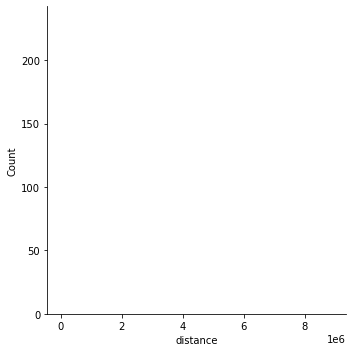

In [143]:
sns.displot(df, x='distance', binwidth=50)

<a id="data/variables"></a>
### 2.4. Project Variables

Using response variable:
> - rent_price (int, per person)

The project will analyze the following as potential explanatory variables:

> **dummy**
> - air_conditioning 
> - pets_allowed 
> - internet_included 
> - kitchen_available 
> - laundry_available
> - internet_included
> - near_bus
> - osparking_included 
> - osparking_available
> - psparking_available
> - electricity_included
> - heat_included
> - water_included
> - furniture_included    

> **discrete**     
> - bedrooms (number of bedrooms, 'studio' = 0)
> - bathrooms (number of bathrooms)
> - date_available         

> **continuous**     
> - distance

These are effectively just translations of the information offered by database to prospective renters. We are trying to build a releaved-preference model, and want to rely on tangible consumer choices. 

<a id="EDA"></a>
## 3. Exploratory Data Analysis
Now that we've cleaned our dataset, let's take a look at the numbers!

<a id="EDA"></a>
### 3.1. Univariate Analysis of Rent Price

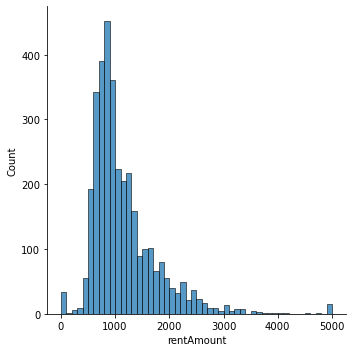

In [144]:
sns.displot(listings,x='rentAmount',binwidth=100)
#positive skew

In [82]:
# Natural Log of Price 
# take ln of price. Might be useful to have. 
# take ln of sales prices, plot
import numpy as np

ln_list = []
for index, row in adjusted_listings.iterrows(): 
    ln_price = np.log(row['rentAmount'])
    ln_list.append(ln_price)
adjusted_listings['logUnitPrice'] = ln_list
adjusted_listings['logUnitPrice'] = adjusted_listings['logUnitPrice'].astype(float)

seaborn.displot(adjusted_listings,x='logUnitPrice')

NameError: name 'adjusted_listings' is not defined

In [ ]:
ln_list = []
for index, row in adjusted_listings.iterrows(): 
    ln_price = np.log(row['truePrice'])
    ln_list.append(ln_price)
adjusted_listings['logTruePrice'] = ln_list
adjusted_listings['logTruePrice'] = adjusted_listings['logTruePrice'].astype(float)


seaborn.displot(adjusted_listings,x='logTruePrice')

<AxesSubplot:xlabel='air_conditioning', ylabel='rentAmount'>

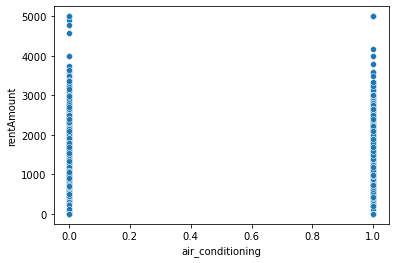

In [213]:
sns.scatterplot(data=listings,x='air_conditioning',y='rentAmount')


In [212]:
seaborn.stripplot(data=adjusted_listings, x='air_conditioning',y='logTruePrice')

NameError: name 'seaborn' is not defined

<a id="EDA/assumptions"></a>
### 3.2. Testing the Assumptions of Linear Regression
QQ plot
Homoscedasticity 


In [ ]:
# mutual independence


In [ ]:
# independent of covariates

In [ ]:
# normality

In [ ]:
# homoskedasticity

<a id="EDA/correlation"></a>
### 3.3. Correlation Analysis

In [ ]:
# price vs date

<AxesSubplot:>

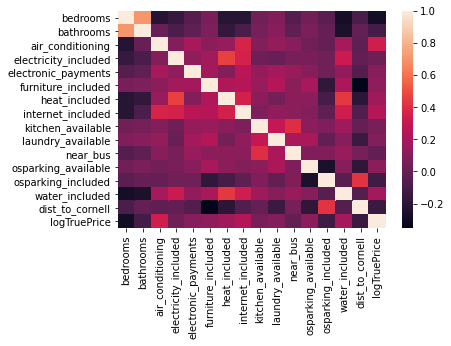

In [1422]:
seaborn.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns)
#multicollinearity among amenities. Probably best to turn into an ordinal variable of 'many amenities', 'some amenities', etc. 
#also see correlation between #bed/baths. Best bet is probably to only use one. 
# we also see that none of the explanatory variables have a particulary strong correlation with price. 

<AxesSubplot:xlabel='dist_to_cornell', ylabel='logTruePrice'>

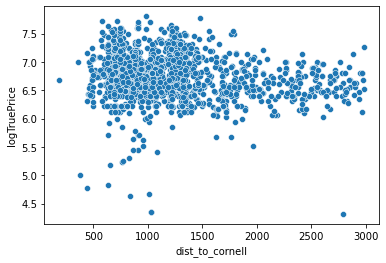

In [1444]:
seaborn.scatterplot(data=regression_vars,x='dist_to_cornell',y='logTruePrice')
# doesn't appear to be much in the way of correlation

In [1421]:
adjusted_listings.dateAvailable=pd.to_numeric(adjusted_listings.dateAvailable)
adjusted_listings.columns
regression_vars = adjusted_listings.drop(columns=['listingAddress', 'unitNumber', 'rentAmount', 'rentType', 'housingType', 'dateAvailable', 'gmapLatitude',
       'gmapLongitude', 'faculty', 'ugrad', 'sabbatical', 'fa_sublet', 'spr_sublet', 'sum_sublet', 'short_term', 'graduate', 'truePrice','logUnitPrice','pets','psparking_available'])
var_corr = regression_vars.corr()
print(var_corr)

                      bedrooms  bathrooms  air_conditioning  \
bedrooms              1.000000   0.705262         -0.217472   
bathrooms             0.705262   1.000000          0.010034   
air_conditioning     -0.217472   0.010034          1.000000   
electricity_included -0.154050  -0.087774          0.100498   
electronic_payments  -0.049927  -0.018969          0.203266   
furniture_included    0.060228   0.076363          0.124616   
heat_included        -0.210624  -0.172719          0.162868   
internet_included    -0.214578  -0.088615          0.369762   
kitchen_available     0.042824   0.054995          0.093517   
laundry_available     0.090000   0.108357          0.145780   
near_bus             -0.051170  -0.015462          0.107267   
osparking_available   0.035209   0.071383          0.039209   
osparking_included   -0.032251   0.002563         -0.002596   
water_included       -0.277763  -0.256506          0.205716   
dist_to_cornell      -0.087367  -0.000273         -0.02

In [ ]:
regression_vars.columns

<AxesSubplot:xlabel='bedrooms', ylabel='logTruePrice'>

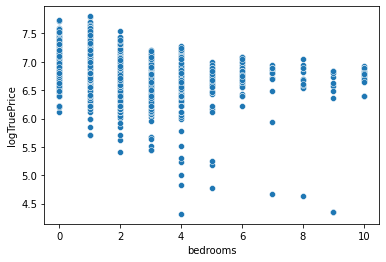

In [1435]:
seaborn.scatterplot(data=regression_vars,x='bedrooms',y='logTruePrice')

<AxesSubplot:xlabel='air_conditioning', ylabel='logTruePrice'>

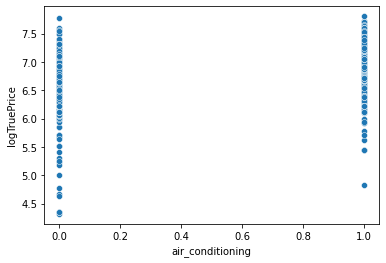

In [1436]:
seaborn.scatterplot(data=regression_vars,x='air_conditioning',y='logTruePrice')

<a id="modeling"></a>
## 4. Modeling  

<a id="modeling/construction"></a>
### 4.1. Model Construction

In [1433]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit = smf.ols('logTruePrice ~ bedrooms + bathrooms + dist_to_cornell+C(air_conditioning)+C(electricity_included)+C(electronic_payments)+C(furniture_included)' \
                     '+C(heat_included)+C(internet_included)+C(kitchen_available)+C(laundry_available)+C(near_bus)+C(osparking_available)+C(osparking_included)+C(water_included)',data=regression_vars).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logTruePrice   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     34.25
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           2.01e-86
Time:                        16:11:11   Log-Likelihood:                -543.30
No. Observations:                1700   AIC:                             1119.
Df Residuals:                    1684   BIC:                             1206.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           6.6822      0.055    120.884      0.000       6.574       6.791
C(air_conditioning)[T.True]         0.1671      0.019      8.887      0.000       0.130       0.204
C(electricity_included)[T.True]    -0.0983      0.021     -4.771      0.000      -0.139      -0.058
C(electronic_payments)[T.True]      0.0082      0.017      0.470      0.638      -0.026       0.042
C(furniture_included)[T.True]       0.0193      0.022      0.875      0.382      -0.024       0.063
C(heat_included)[T.True]            0.0444      0.021      2.098      0.036       0.003       0.086
C(internet_included)[T.True]        0.0757      0.020      3.785      0.000       0.036       0.115
C(kitchen_available)[T.True]        0.0974      0.054      1.815      0.070      -0.008       0.203
C(laundry_available)[T.True]        0.0310      0.027      1.158      0.247      -0.022       0.084
C(near_bus)[T.True]                -0.1233      0.033     -3.791      0.000      -0.187      -0.060
C(osparking_available)[T.True]      0.0455      0.018      2.553      0.011       0.011       0.080
C(osparking_included)[T.True]      -0.0441      0.020     -2.246      0.025      -0.083      -0.006
C(water_included)[T.True]           0.0544      0.022      2.417      0.016       0.010       0.098
bedrooms                           -0.0667      0.007     -9.897      0.000      -0.080      -0.053
bathrooms                           0.0814      0.020      4.152      0.000       0.043       0.120
dist_to_cornell                 -6.759e-05   1.77e-05     -3.825      0.000      -0.000   -3.29e-05
==============================================================================
Omnibus:                      505.003   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2728.980
Skew:                          -1.286   Prob(JB):                         0.00
Kurtosis:                       8.649   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1448]:
fit = smf.ols('logTruePrice ~ bedrooms +bathrooms + C(kitchen_available) + C(air_conditioning) +C(internet_included)+ C(near_bus)',data=regression_vars).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logTruePrice   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     64.89
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           1.01e-72
Time:                        16:20:52   Log-Likelihood:                -593.66
No. Observations:                1700   AIC:                             1201.
Df Residuals:                    1693   BIC:                             1239.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        6.6345      0.051    130.393      0.000       6.535       6.734
C(kitchen_available)[T.True]     0.1574      0.053      2.983      0.003       0.054       0.261
C(air_conditioning)[T.True]      0.1844      0.019      9.699      0.000       0.147       0.222
C(internet_included)[T.True]     0.0890      0.018      4.817      0.000       0.053       0.125
C(near_bus)[T.True]             -0.1218      0.033     -3.705      0.000      -0.186      -0.057
bedrooms                        -0.0596      0.007     -8.764      0.000      -0.073      -0.046
bathrooms                        0.0622      0.020      3.158      0.002       0.024       0.101
==============================================================================
Omnibus:                      452.906   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2191.615
Skew:                          -1.175   Prob(JB):                         0.00
Kurtosis:                       8.042   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="modeling/construction"></a>
### 4.2. Model Selection
Min AIC
p-value

<a id="modeling/validation"></a>
### 4.3. Model Validation

<a id="conclusion"></a>
## 5. Conclusion

<a id="conclusion/findings"></a>
###  5.1. Primary Findings
Both Model 1 and Model 2 fail to account for the majority of changes in listing price. Model 1 had an associated r-squared value of 0.234, and Model 2 of 0.187.  While the method of hedonic modeling is well-established in evaluating real-estate prices, the data lifted from the Off-Campus Living listings site does not appear to yield much in the way of significant results. It does appear that the presence of a kitchen and of air conditioning has the greatest positive effects on price, and as does the number of bedrooms on price per person. While models evaluated can only reasonably account for about 20% of observed price changes, given the F-Statistics of both models, it is unlikey that they are purely the result of noise: they do not fit the data to a great extent, but rather more confidently account for a small change in price. 

This could be on part of a couple different factors. The first is that renters, and especially Cornell renters, might be more likely to be low-information buyers.   
With limited information, lack of experience in searching for houses, lack of long-term commitment in the property itself, and a busy schedule, it is not unlikely that Cornell students simply do not evaluate each listing with great scrutiny. It is also the probability that the models are missing a number of important data points. The listing site does not give customers the square footage of each listing, a normally fundamental data point in evaluating properties. The model also does not account for local attractions and points of interest. Listings near popular bars or resturants may be more attractive to buyers. 

The main lessons that can be taken as a buyer from this project are: 1. Living with friends will reduce your cost on a per person basis. 2. Air conditioning comes at a premimum, and 3. Distance to Cornell does not appear to significant affect price, so feel free to look at listings near campus. 


<a id="conclusion/improvements"></a>
### 5.2. Areas for Potential Improvement
Some potential improvements to the project:
- Using sales data instead of advertised listing data to better match student revealed preference
- Employ Principle Component Analysis to better find indicator variables.  
- Employ natural language processing (NLP) to analyze listing descriptions and find consumer preferences. 

The data in question merits more study. Some interesting studies to conduct in the futute might include:
- classificaiton research to find good deals and present information similarly to seekgreek.   
- application of more complicated machine learning methods (random forest, KNN) to find future insights.    
- more detailed study on Ithaca area real estate market as whole

<a id="references"></a>
## 6. References & Resources

- https://cornellsun.com/2020/03/06/as-students-struggle-to-find-housing-three-ilr-juniors-form-new-ithaca-tenants-union/
- https://www.ithaca.com/news/why-is-ithaca-one-of-the-least-affordable-us-cities/article_e67f68f4-cb0e-11e3-9571-001a4bcf887a.html
- https://ithacavoice.com/2017/02/cornell-maximum-capacity-pay-collegetown-rents-almost-2k/
- https://ncre.cornell.edu/what-north-campus-residential-expansion
- https://www.huduser.gov/portal/publications/pdf/CMAR_IthacaNY.pdf